In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from util import *

plt.style.use("ggplot")

In [2]:
df = pd.read_json("./data/preprocessed/preprocessed.json", orient="index")
with open("./data/preprocessed/param.json", "r") as f:
    params = json.load(f)
    print("params:", params)

user_n, item_n = params["user_n"], params["item_n"]

params: {'user_n': 1096, 'item_n': 3664}


{'Accuracy@10': 0.19133004926108374, 'Uplift@10': 0.02811087653452187, 'Accuracy@30': 0.10256160830090792, 'Uplift@30': 0.02132463626760645, 'Accuracy@100': 0.04873748789150791, 'Uplift@100': 0.012353288307062992}


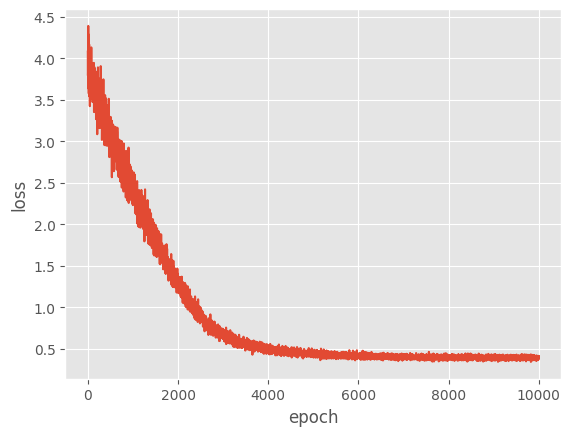

{'Accuracy@10': 0.15990196078431373, 'Uplift@10': 0.0753213507625272, 'Accuracy@30': 0.07324923176451562, 'Uplift@30': 0.0536910864578859, 'Accuracy@100': 0.029729206963249516, 'Uplift@100': 0.031061032216237888}


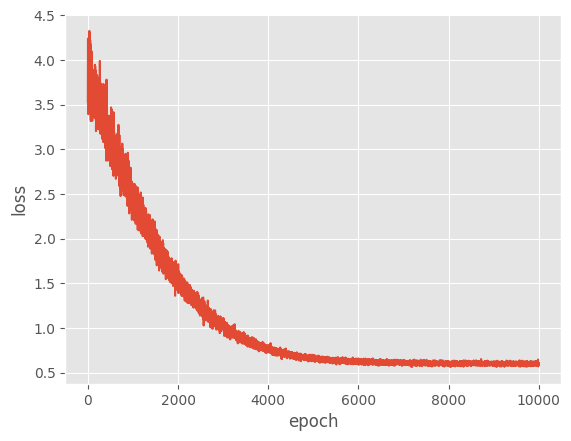

In [7]:
for sampling in ["accuracy-based-pointwise", "uplift-based-pointwise"]:
    args = Args(sampling=sampling, epochs=10_000, batch_size=1_000)

    X_u, X_v, losses = train_rmf(
        df=df,
        user_n=user_n,
        item_n=item_n,
        args=args,
    )

    result = eval(
        X_u=X_u,
        X_v=X_v,
        df=df,
        top_k=[10, 30, 100],
        args=args,
    )
    print(result)

    add_record(args=vars(args), evaluations=result)

    plt.plot(losses)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.show()